In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
train_df_low = pd.read_csv(r'Data\Toxic Comment Classification Challenge\train.csv')
train_df_high = pd.read_csv(r'Data\Jigsaw Unintended Bias in Toxicity Classification\train.csv')

In [3]:
train_df_high

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [4]:
train_df_low

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Concatenate Datasets 

In [5]:
x_data = pd.DataFrame()

text = train_df_high["comment_text"]
target = train_df_high["target"]
text = np.concatenate((text,train_df_low['comment_text']) )
target = np.concatenate((target, train_df_low["toxic"]))

target = np.where(target >= 0.5, 1,0)

In [6]:
len(text)

1964445

In [7]:
np.unique(target, return_counts=True)

(array([0, 1]), array([1804817,  159628], dtype=int64))

In [8]:
len(target)

1964445

dist :  [1804817  159628]


<BarContainer object of 2 artists>

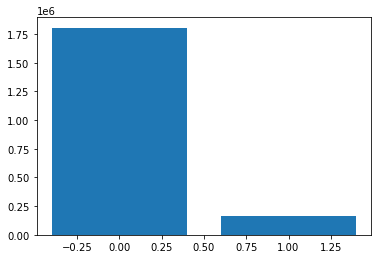

In [11]:
uniq, count = np.unique(target, return_counts=True)
print("dist : ",count)
plt.bar(uniq, count)

# Data Balance

In [13]:
import random

In [14]:
toxic = text[target == 1]
nonToxic = text[target == 0]

In [15]:
len(toxic)

159628

In [16]:
len(nonToxic)

1804817

In [17]:
nonToxic_ch = random.sample(list(nonToxic), len(toxic))

In [18]:
x_data["text"] = np.concatenate((toxic, nonToxic_ch))

In [19]:
x_data["text"]

0                      haha you guys are a bunch of losers.
1                                      ur a sh*tty comment.
2         It's ridiculous that these guys are being call...
3         This story gets more ridiculous by the hour! A...
4         Angry trolls, misogynists and Racists", oh my....
                                ...                        
319251    A refugee with 5 kids will get 30,000 a year f...
319252    Free speech means speech suppression to progre...
319253    Someone want to remind Graham that he has no b...
319254    if you watch the vid closely, ovechkin starts ...
319255    The ruling class?\nHow depressing - and outrag...
Name: text, Length: 319256, dtype: object

In [20]:
y_data = [1]*len(toxic)+[0]*len(nonToxic_ch)

dist :  [159628 159628]


<BarContainer object of 2 artists>

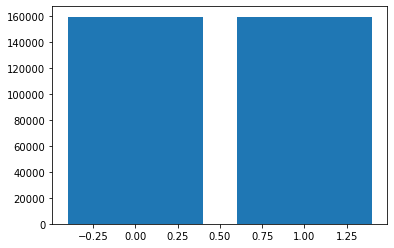

In [21]:
uniq, count = np.unique(y_data, return_counts=True)
print("dist : ",count)
plt.bar(uniq, count)

# Data Preprocessing

In [3]:
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
orn = "The best course's Natural Language Processs that I have ever studied!! "

In [14]:
t = re.sub(r'\W', ' ', str(orn))
t = re.sub(r'\s+[a-zA-Z]\s+', ' ', t)
t = re.sub(r'\^[a-zA-Z]\s+', ' ', t) 
t = re.sub(r'\s+', ' ', t, flags=re.I)
t = re.sub(r'^b\s+', '', t)
t = t.lower()
t = t.split()
t = [lemmatizer.lemmatize(word) for word in t]
t = ' '.join(t)

In [15]:
t

'the best course natural language process that have ever studied cring'

In [22]:
%%time
texts = x_data['text']
for i in range(len(texts)):
    if i%10000 == 0:
        print('Step -> ',i)
    t = re.sub(r'\W', ' ', str(texts[i]))
    t = re.sub(r'\s+[a-zA-Z]\s+', ' ', t)
    t = re.sub(r'\^[a-zA-Z]\s+', ' ', t) 
    t = re.sub(r'\s+', ' ', t, flags=re.I)
    t = re.sub(r'^b\s+', '', t)
    t = t.lower()
    t = t.split()
    
    t = [lemmatizer.lemmatize(word) for word in t]
    t = ' '.join(t)
    
    texts[i] = t
        
x_data['text'] = texts

Step ->  0
Step ->  10000
Step ->  20000
Step ->  30000
Step ->  40000
Step ->  50000
Step ->  60000
Step ->  70000
Step ->  80000
Step ->  90000
Step ->  100000
Step ->  110000
Step ->  120000
Step ->  130000
Step ->  140000
Step ->  150000
Step ->  160000
Step ->  170000
Step ->  180000
Step ->  190000
Step ->  200000
Step ->  210000
Step ->  220000
Step ->  230000
Step ->  240000
Step ->  250000
Step ->  260000
Step ->  270000
Step ->  280000
Step ->  290000
Step ->  300000
Step ->  310000
Wall time: 19min 54s


In [23]:
x_data['target'] = y_data
x_data.to_csv('Data\\preprocessed_data.csv',index=False)

In [24]:
x_data

,text,target
0,haha you guy are bunch of loser,1
1,ur sh tty comment,1
2,it ridiculous that these guy are being called ...,1
3,this story get more ridiculous by the hour and...,1
4,angry troll misogynist and racist oh my it doe...,1
...,...,...
319251,more evidence that trump is in his heart of he...,0
319252,i definitely did not like him in life or in th...,0
319253,yes they did oppose everything he did because ...,0
319254,barney clyde cartoon strip below the letter to...,0
